In [2]:
import requests 
import pandas 
from datetime import date
from datetime import timedelta
pandas.options.display.float_format = '{:.2f}'.format

# Dans le fichier le nombre afficher à chque jour est le nouveau nombre de cas (ou de décès) par région 
# À partir du 22 janvier 2020 

#Lien pour les CAS https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

#Lien pour les DÉCÈS https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

#Lien pour les rétablisssements https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

In [3]:
#Variable pour avoir automatiquement la dernière colonne du tableau soit la dernière journée. 
today = date.today()
hier = today - timedelta (days = 1)
hier = hier.strftime("%#m/%#d/%y")



In [4]:
#Importer le fichier (NB DE DÉCÈS)
fichier_morts = pandas.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv', delimiter=',')
#Remplacer certains noms pour faire le bon joint avec l'autre fichier plus tard 
fichier_morts_RR = fichier_morts.replace("US","United States").replace("Iran","Iran, Islamic Rep.")


#Faire la somme de décès par pays (et non pas par région)
fichier_morts_RR_grouper = fichier_morts_RR.groupby(["Country/Region"])[[hier]].sum()


#Faire le top 10 des décès par pays. 
fichier_morts_RR_grouper_trier = fichier_morts_RR_grouper.sort_values(by=[hier],ascending=False).head(10)
fichier_morts_RR_grouper_trier

,4/6/20
Country/Region,
Italy,16523
Spain,13341
United States,10783
France,8926
United Kingdom,5385
"Iran, Islamic Rep.",3739
China,3335
Netherlands,1874
Germany,1810


In [5]:
#Importer le fichier csv de la World Bank. 
GDP = pandas.read_csv("Data_H.csv",delimiter=',', skiprows=4)
#error_bad_lines= False)

#GDP_trier = GDP.sort_values(by=["2019"],ascending=False).head(10)


#Faire le joint entre
Data_full = fichier_morts_RR_grouper.join(GDP.set_index("Country Name"), on="Country/Region")

Data_full_trier = Data_full.sort_values(by=[hier],ascending=False).head(10)
Data_full_trier


,4/6/20,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Country/Region,,,,,,,,,,,,,,,,,,,,,
Italy,16523,ITA,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,nan,nan,nan,nan,nan,nan,...,8.83,8.96,8.95,9.01,8.99,8.94,nan,nan,nan,nan
Spain,13341,ESP,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,nan,nan,nan,nan,nan,nan,...,9.09,9.08,9.03,9.02,9.12,8.97,nan,nan,nan,nan
United States,10783,USA,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,nan,nan,nan,nan,nan,nan,...,16.37,16.37,16.33,16.51,16.82,17.07,nan,nan,nan,nan
France,8926,FRA,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,nan,nan,nan,nan,nan,nan,...,11.19,11.32,11.44,11.60,11.50,11.54,nan,nan,nan,nan
United Kingdom,5385,GBR,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,nan,nan,nan,nan,nan,nan,...,8.42,8.34,9.77,9.72,9.79,9.76,nan,nan,nan,nan
"Iran, Islamic Rep.",3739,IRN,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,nan,nan,nan,nan,nan,nan,...,6.61,6.64,5.99,6.91,7.76,8.10,nan,nan,nan,nan
China,3335,CHN,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,nan,nan,nan,nan,nan,nan,...,4.33,4.55,4.71,4.77,4.89,4.98,nan,nan,nan,nan
Netherlands,1874,NLD,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,nan,nan,nan,nan,nan,nan,...,10.52,10.90,10.90,10.86,10.39,10.36,nan,nan,nan,nan
Germany,1810,DEU,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,nan,nan,nan,nan,nan,nan,...,10.72,10.77,10.92,10.96,11.08,11.14,nan,nan,nan,nan


Text(0, 0.5, '% du PIB')

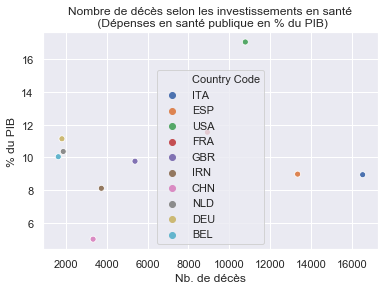

In [23]:
#Faire le graphique 
import seaborn 
import matplotlib.pyplot
# Y = 2018 car c'est l'année la plus récente où nous avons le PIB de chaque pays du top 10. 
graph = seaborn.scatterplot(x=hier, y='2016', hue='Country Code', data= Data_full_trier)
matplotlib.pyplot.title("Nombre de décès selon les investissements en santé\n (Dépenses en santé publique en % du PIB)")
matplotlib.pyplot.xlabel("Nb. de décès")
matplotlib.pyplot.ylabel("% du PIB")
